# IS 4487 Module 3 Script

## Agenda

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical 
    variable.
 - Calculate a count (and a proportion) for a categorical variable 
    and visualize the result into a plot.

Make sure you have downloaded the data from Canvas.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [8]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [9]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/megatelco.csv')

Mounted at /content/gdrive


In [10]:
#look at the top rows
df.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [11]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

In [12]:
#describe the data before cleaning it
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [13]:
df[['house','leave']].groupby('leave').mean().round(2) 

,house
leave,
LEAVE,438702.89
STAY,547435.45


# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

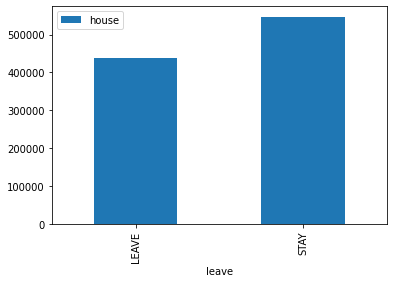

In [14]:
#Bar chart
df[['house','leave']].groupby('leave').mean('house').plot.bar()


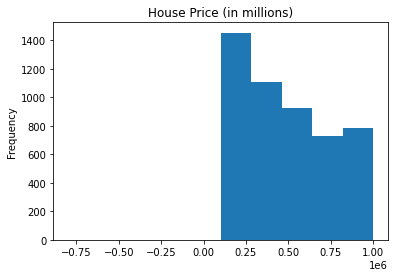

In [15]:
#Histogram
hist = df['house'].plot.hist(bins=10,title='House Price (in millions)')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


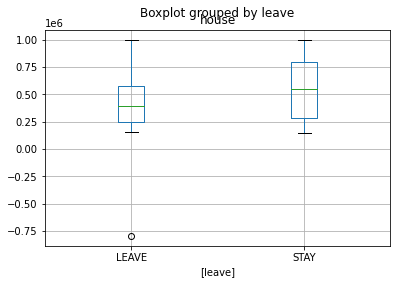

In [17]:
#Boxplot
df[['leave','house']].boxplot(by='leave')

# Explore Relationships

How does College affect leaving?

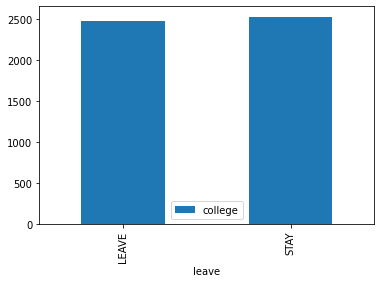

In [18]:
#Bar chart with counts
df[['college','leave']].groupby('leave').count().plot.bar()

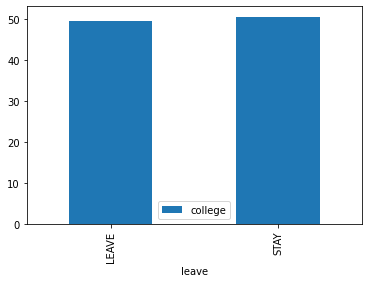

In [19]:
#Bar chart with percentage
college_summary = df[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

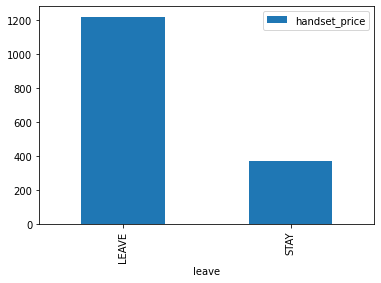

In [20]:
#Bar chart with mean price
handset_price_summary = df[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

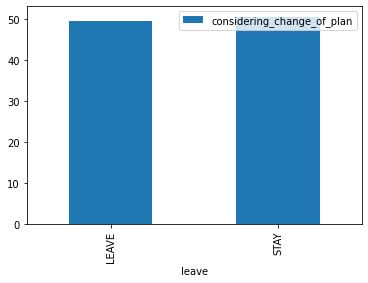

In [21]:
#Bar chart with percentage
plan = df[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='leave')
plt.show()